<a href="https://colab.research.google.com/github/Yuva007-D/OIBSIP-PROJECT/blob/main/iris_flower_classificationProject1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!kaggle datasets download -d saurabh00007/iriscsv

Dataset URL: https://www.kaggle.com/datasets/saurabh00007/iriscsv
License(s): CC0-1.0
iriscsv.zip: Skipping, found more recently modified local copy (use --force to force download)


In [2]:
!unzip iriscsv.zip

Archive:  iriscsv.zip
  inflating: Iris.csv                




NAME:DASARI.YUVA MANI KISHORE

TASK1:-IRIS FLOWER CLASSIFICATION

The Iris flower classification dataset comprises a total of 150 samples of Iris flowers, which are divided into three distinct species:



1.  Iris setosa
2. Iris versicolor
3. Iris virginica




This dataset is organized into three classes, each containing 50 instances, representing different types of Iris plants. Notably, one of these classes can be separated from the other two using a linear boundary, whereas the remaining two classes are not linearly separable from each other

The dataset includes the following attributes for each Iris sample:
1. Sepal length in centimeters
2. Sepal width in centimeters
3. Petal length in centimeters
4. Petal width in centimeters
5. Class

These attributes serve as measurements for the Iris flowers. This dataset is widely recognized and employed as a benchmark in the field of machine learning for supervised classification tasks. The primary objective is to accurately classify Iris flowers into their respective species based on these measurement features.

In [3]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')


In [4]:
# LOADING THE DATASET
df = pd.read_csv('/content/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# Delete a column

df = df.drop(columns=["Id"])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# To display stats about data
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
# To display basic info about datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
# To display no. of samples on each class
df['Species'].value_counts()

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


Preprocessing the dataset

In [ ]:
# Check for null values
df.isnull().sum()

,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [ ]:
#Label encoding to convert class labels into numeric form
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])
df['Species']

,Species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [ ]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Exploratory Data Analysis


<Axes: >

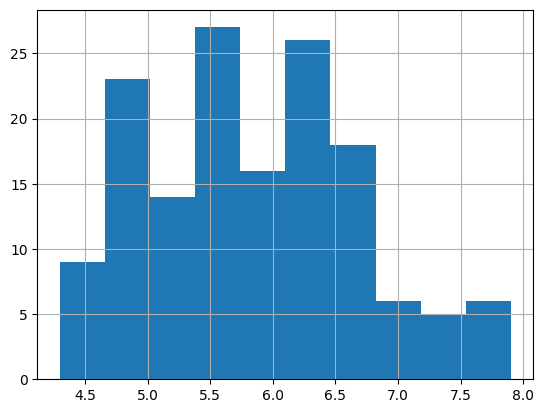

In [ ]:
# Histograms
df['SepalLengthCm'].hist()

<Axes: >

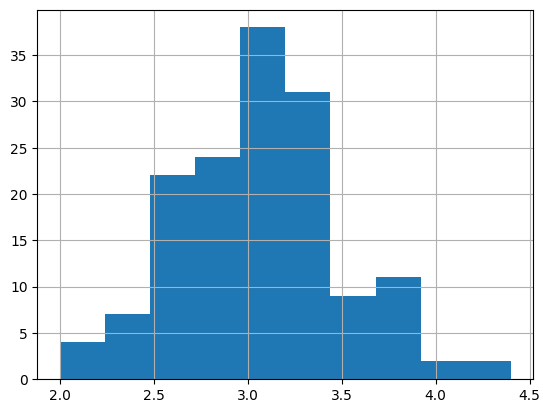

In [ ]:
df['SepalWidthCm'].hist()

<Axes: >

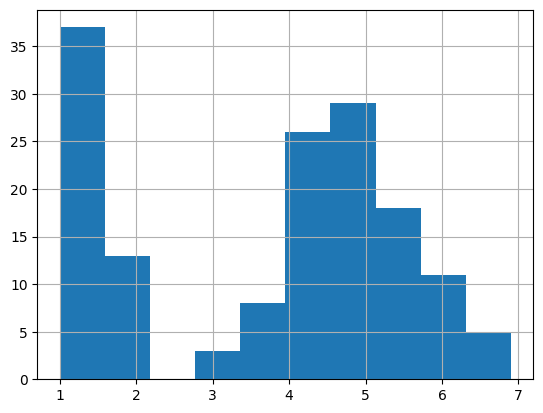

In [ ]:
df['PetalLengthCm'].hist()

<Axes: >

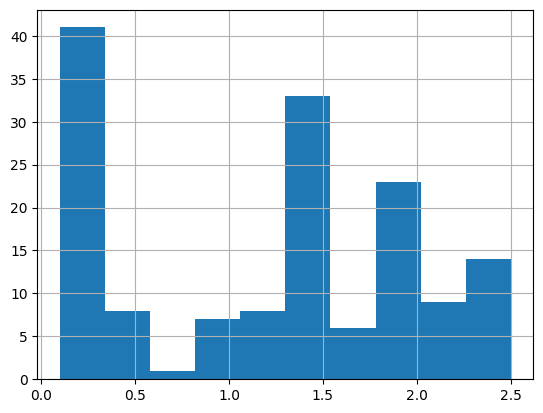

In [ ]:
df['PetalWidthCm'].hist()

<Axes: xlabel='Species', ylabel='count'>

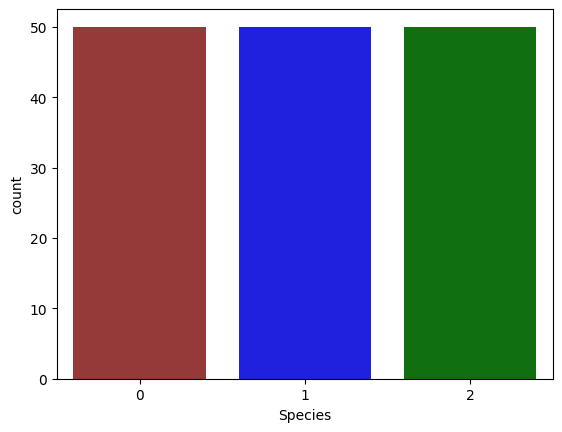

In [ ]:
sns.countplot(x='Species',data=df,palette=['BROWN','BLUE','GREEN'])

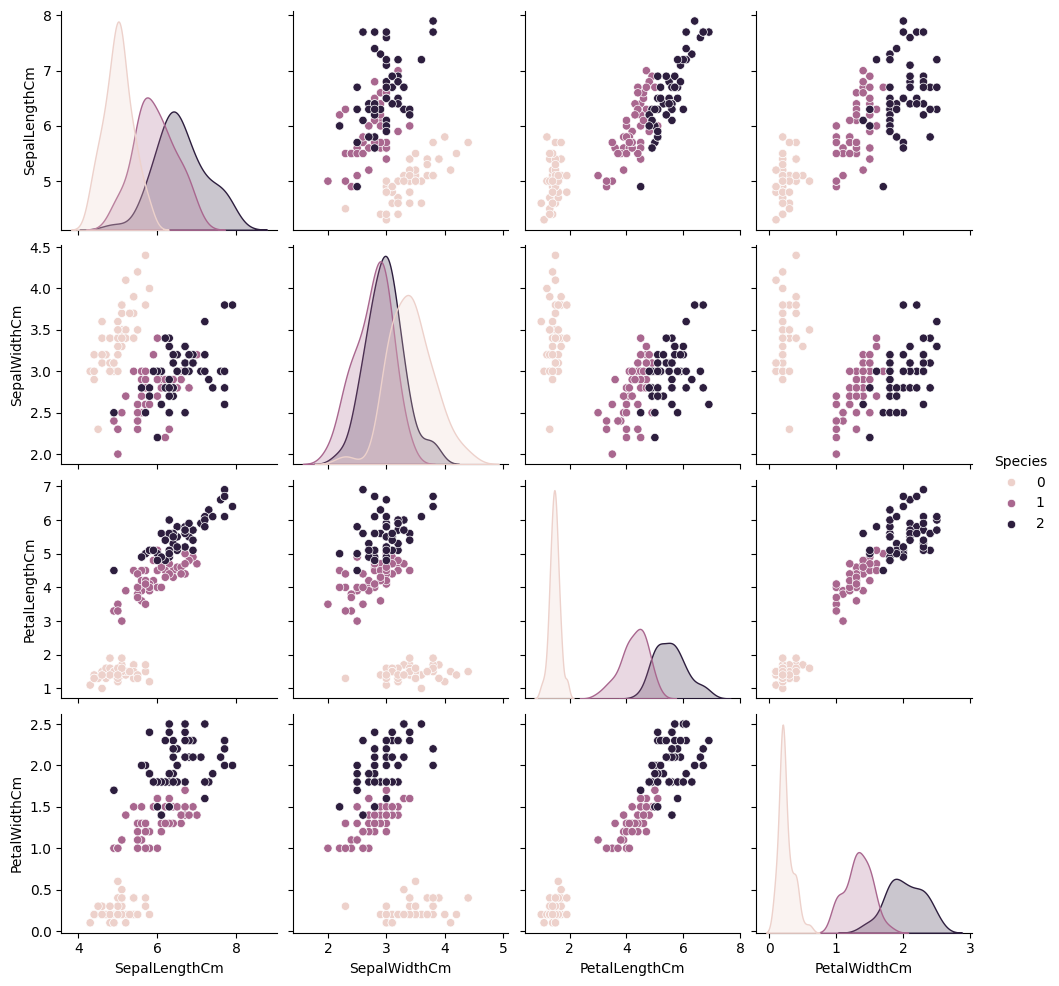

In [ ]:
sns.pairplot(df,hue='Species')

<Axes: xlabel='Species', ylabel='SepalLengthCm'>

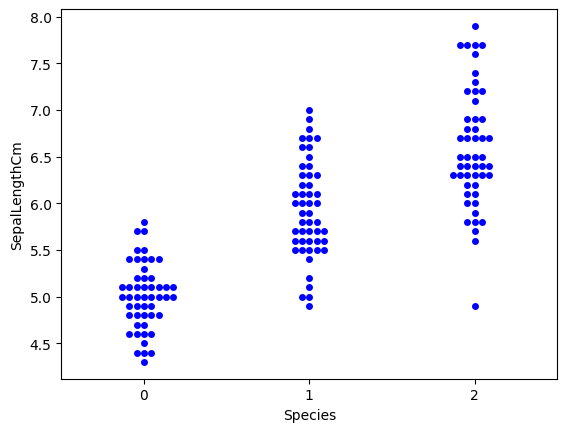

In [ ]:
sns.swarmplot(x='Species', y='SepalLengthCm', color='blue', data=df)

<Axes: xlabel='Species', ylabel='SepalWidthCm'>

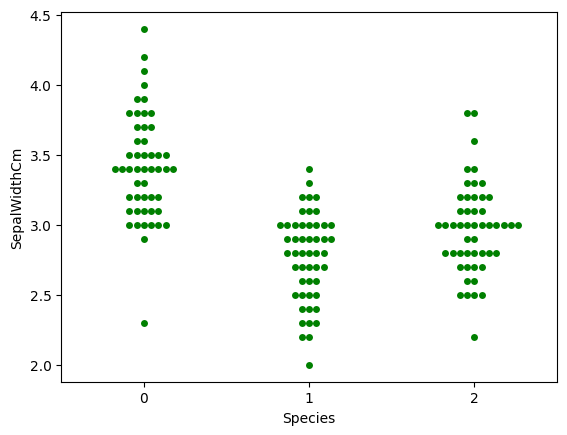

In [ ]:
sns.swarmplot(x='Species', y='SepalWidthCm', color='green', data=df)

<Axes: xlabel='Species', ylabel='PetalLengthCm'>

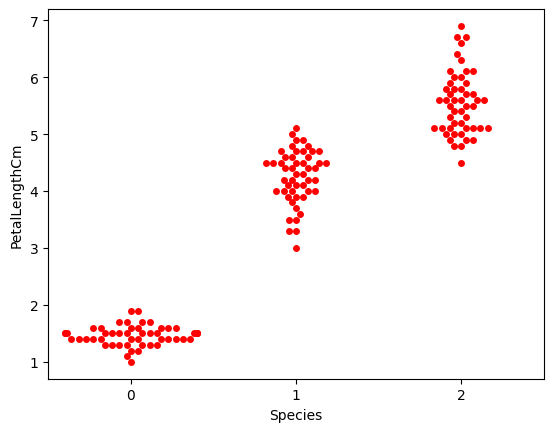

In [ ]:
sns.swarmplot(x='Species', y='PetalLengthCm', color='red', data=df)

<Axes: xlabel='Species', ylabel='PetalWidthCm'>

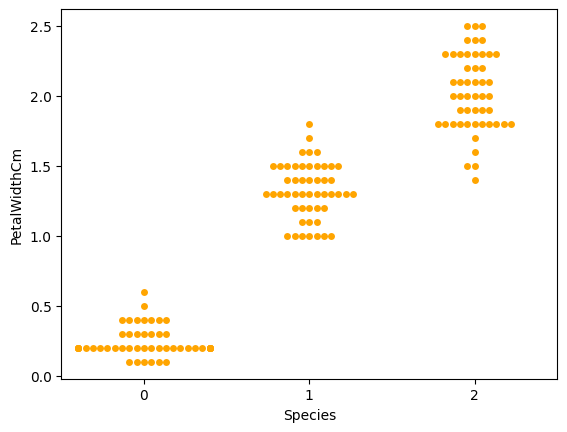

In [ ]:
sns.swarmplot(x='Species', y='PetalWidthCm', color='orange', data=df)

Correlation Matrix

In [ ]:
# Compute the correlation matrix
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.782561,-0.419446,0.949043,0.956464,1.000000


<Axes: >

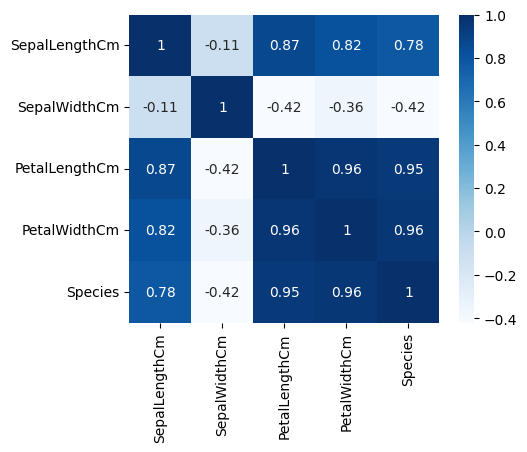

In [ ]:
# display the correlation matrix using a heatmap
corr = df.corr()
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax=ax, cmap='Blues')

Model Training

In [ ]:
x = df.drop(columns=['Species'])
y = df['Species']

In [ ]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

MODEL 1

In [ ]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(x_train, y_train)
accuracy_logreg = model1.score(x_test, y_test) * 100
print("Accuracy (Logistic Regression): ", accuracy_logreg)

Accuracy (Logistic Regression):  97.77777777777777


MODEL 2

In [ ]:
# K-nearest neighbours Model(KNN)
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier()
model2.fit(x_train, y_train)
accuracy_knn = model2.score(x_test, y_test) * 100
print("Accuracy (KNN): ", accuracy_knn)

Accuracy (KNN):  97.77777777777777


MODEL 3

In [ ]:
# Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
model3 = DecisionTreeClassifier()
model3.fit(x_train, y_train)
accuracy_decision_tree = model3.score(x_test, y_test) * 100
print("Accuracy (Decision Tree): ", accuracy_decision_tree)

Accuracy (Decision Tree):  95.55555555555556


CONFUSION MATRIX

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
y_pred1 = model1.predict(x_test)
y_pred2 = model2.predict(x_test)
y_pred3 = model3.predict(x_test)

In [ ]:
conf_matrix1 = confusion_matrix(y_test, y_pred1)
conf_matrix2 = confusion_matrix(y_test, y_pred2)
conf_matrix3 = confusion_matrix(y_test, y_pred3)

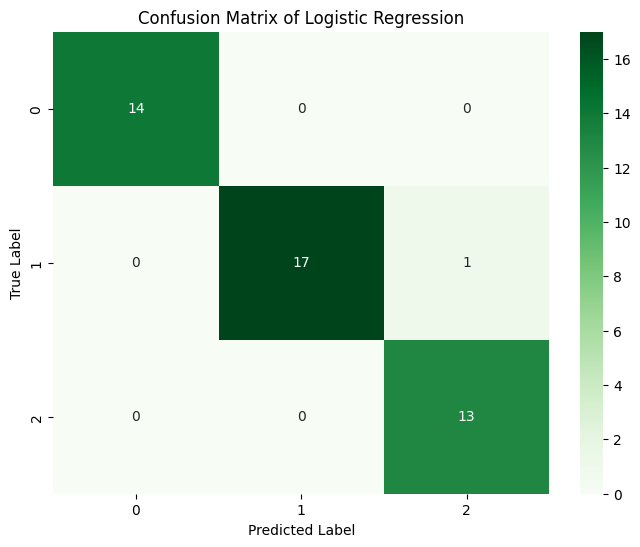

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='Greens', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Logistic Regression')
plt.show()

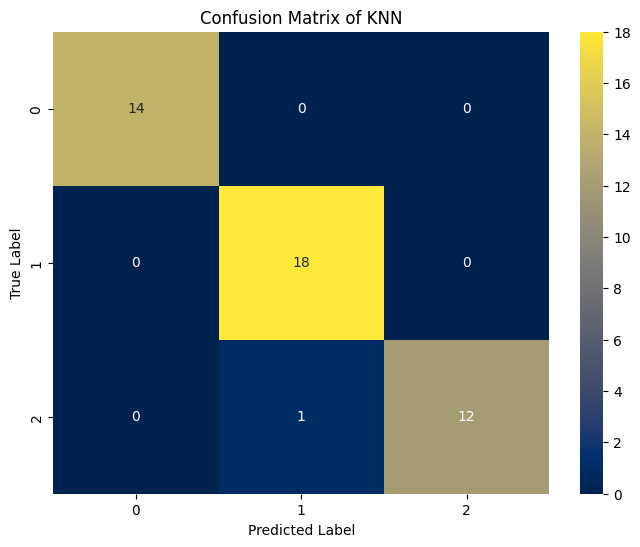

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='cividis', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of KNN')
plt.show()

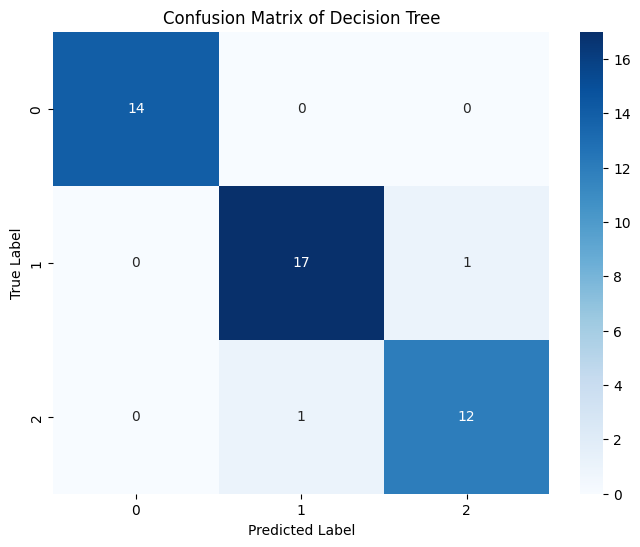

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix3, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Decision Tree')
plt.show()

PROJECT REPORT

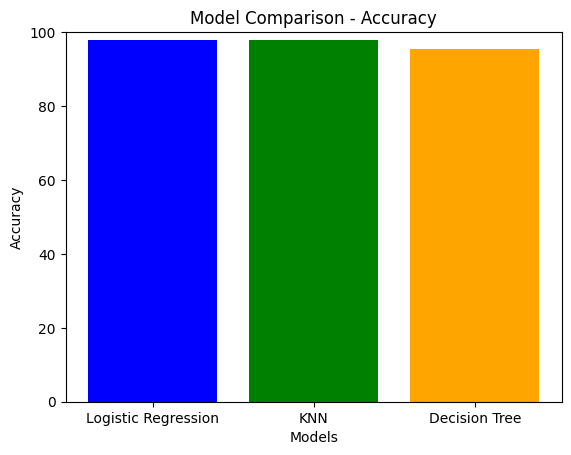

In [ ]:
# Model Comparison - Visualization
models = ['Logistic Regression', 'KNN', 'Decision Tree']
accuracies = [accuracy_logreg, accuracy_knn, accuracy_decision_tree]

plt.bar(models, accuracies, color=['blue', 'green', 'orange'])
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Comparison - Accuracy")
plt.ylim([0, 100])
plt.show()